<a href="https://colab.research.google.com/github/perezm-496/AI4MedImg/blob/main/001_Perceptron_Esp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

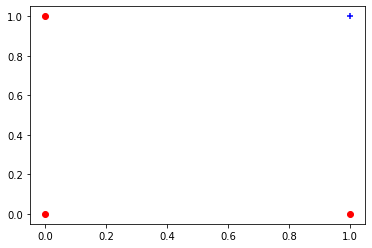

In [10]:
""" Simple Plot of the Examples we are going to use."""

import numpy as np
import matplotlib.pyplot as plt

# We try to emulate an and gate.

# samples

# inputs -- we add a bias entry at x^0 = 1
x = np.asarray( [ [0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]], dtype=np.float)

# outputs -- A single output t = x1 and x2
t = np.asarray( [0, 0, 0, 1], dtype=np.float )

# Positive examples
xp = x[t == 1,:]

# Negative examples
xn = x[t == 0, :]

# Scatter Plot of Possitive and Negatives
plt.scatter(xp[:,0], xp[:,1], color = 'blue', marker='+')
plt.scatter(xn[:,0], xn[:,1], color = 'red', marker='o')

In [14]:
""" Simple Perceptron implemented with Numpy."""

import numpy as np
import matplotlib.pyplot as plt

# We try to emulate an and gate.

# samples

# inputs -- we add a bias entry at x^0 = 1
x = np.asarray( [ [1, 0, 0],
                  [1, 0, 1],
                  [1, 1, 0],
                  [1, 1, 1]], dtype=np.float)

# outputs -- A single output t = x1 and x2
t = np.asarray( [ [0, 0, 0, 1]], dtype=np.float )


def h(t):
    """The usual activation function, Heaviside function. """
    # return np.asarray(t > 0.0, dtype=np.float)
    return np.heaviside(t, 0)

# Initialize the weights -- We use random weights
W = np.random.rand(1, 3)

# We need to compute the output of the neural network.

def perceptron_output(x, W, h):
    """Computes the output of the perceptron."""
    return h(np.matmul(W, x.transpose()))

def error(x, W, h, t):
    """Computes mse the error on the perceptron."""
    return np.sum((t - perceptron_output(x, W, h))**2)

# We execute the algorithm for updating the weights
# We apply the update 5 times.

alpha = 0.1 # learning rate
for it in range(5):
    y = perceptron_output(x, W, h)
    W = W - alpha*np.matmul(y-t, x)
    print(f"Iteration: {it} \t Error: {error(x,W,h,t)}")
    print(W)

Iteration: 0 	 Error: 3.0
[[0.56159276 0.53642222 0.8570451 ]]
Iteration: 1 	 Error: 3.0
[[0.26159276 0.43642222 0.7570451 ]]
Iteration: 2 	 Error: 2.0
[[-0.03840724  0.33642222  0.6570451 ]]
Iteration: 3 	 Error: 1.0
[[-0.23840724  0.23642222  0.5570451 ]]
Iteration: 4 	 Error: 1.0
[[-0.33840724  0.23642222  0.4570451 ]]


In [16]:
"""Simple perceptron implemented with Torch."""

# Tensors and arrays are very similar in the programming terminology.

import torch

# We try to emulate an and gate.
# samples

x = torch.tensor( [ [1, 0, 0],
                  [1, 0, 1],
                  [1, 1, 0],
                    [1, 1, 1]], dtype=torch.float32)

# outputs -- A single output t = x1 and x2
t = torch.tensor( [ [0, 0, 0, 1]], dtype=torch.float32 )


def h(t):
    """The usual activation function, Heaviside function. """
    return torch.heaviside(t, torch.tensor([0], dtype=torch.float32)) # Read torch heaviside

# Initialize the weights -- We use random weights
W = torch.rand(1,3, dtype=torch.float32)

# We need to compute the output of the neural network.
def perceptron_output(x, W, h):
    """Computes the output of the perceptron."""
    return h(torch.matmul(W, x.transpose(1,0)))

def error(y, t):
    """Computes mse the error on the perceptron."""
    return torch.sum((y - t)**2)

# We execute the algorithm for updating the weights
# We apply the update 5 times.

alpha = 0.1 # learning rate
for it in range(5):
    y = perceptron_output(x, W, h)
    W = W - alpha*torch.matmul(y-t, x)
    print(f"Iteration: {it} \t Error: {error(y,t)}")
    print(W)


Iteration: 0 	 Error: 3.0
tensor([[-0.2262,  0.5763,  0.0099]])
Iteration: 1 	 Error: 1.0
tensor([[-0.3262,  0.4763,  0.0099]])
Iteration: 2 	 Error: 1.0
tensor([[-0.4262,  0.3763,  0.0099]])
Iteration: 3 	 Error: 1.0
tensor([[-0.3262,  0.4763,  0.1099]])
Iteration: 4 	 Error: 1.0
tensor([[-0.4262,  0.3763,  0.1099]])


In [22]:
import tensorflow as tf

# We try to emulate an and gate.

# samples
# inputs -- we add a bias entry at x^0 = 1.
# In tf we need to specify this is an array that won't change.
x = tf.constant( [ [1, 0, 0],
                  [1, 0, 1],
                  [1, 1, 0],
                   [1, 1, 1]], dtype=tf.float32)

# outputs -- A single output t = x1 and x2
t = tf.constant( [ [0, 1, 1, 1]], dtype=tf.float32)


def h(t):
    """The usual activation function, Heaviside function. """
    return tf.maximum(0, tf.sign(t))

# Initialize the weights -- We use random weights
W = tf.random.uniform((1,3), dtype=tf.float32)

# We need to compute the output of the neural network.

def perceptron_output(x, W, h):
    """Computes the output of the perceptron."""
    return h(tf.matmul(W,tf.transpose(x)))

def error(x, W, h, t):
    """Computes mse the error on the perceptron."""
    return tf.math.reduce_sum((t - perceptron_output(x, W, h))**2)

# We execute the algorithm for updating the weights
# We apply the update 5 times.

alpha = 0.1 # learning rate
for it in range(5):
    y = perceptron_output(x, W, h)
    W = W - alpha*tf.matmul(y-t, x)
    print(f"Iteration: {it} \t Error: {error(x,W,h,t)}")
    print(W)
    

Iteration: 0 	 Error: 1.0
tf.Tensor([[0.6643926  0.8057705  0.01167738]], shape=(1, 3), dtype=float32)
Iteration: 1 	 Error: 1.0
tf.Tensor([[0.56439257 0.8057705  0.01167738]], shape=(1, 3), dtype=float32)
Iteration: 2 	 Error: 1.0
tf.Tensor([[0.46439257 0.8057705  0.01167738]], shape=(1, 3), dtype=float32)
Iteration: 3 	 Error: 1.0
tf.Tensor([[0.36439258 0.8057705  0.01167738]], shape=(1, 3), dtype=float32)
Iteration: 4 	 Error: 1.0
tf.Tensor([[0.26439258 0.8057705  0.01167738]], shape=(1, 3), dtype=float32)


# Ejercicios

Los siguientes ejercicios buscan brindarle un poco de práctica con el manejo de el ciclo básico de entrenamiento de la mayoría de redes neurales, evitando las complejidades dadas por el manejo de datos masivos y arquitecturas complejas.

## Ejercicio 1

Modifique el procedimiento de entrenamiento del perceptron mostrado anteriormente (numpy, tensorflow, keras) para que continue el entrenamiento mientras se cumplan las dos siguientes condiciones:
1. El error sea mayor que 0.
2. El número de iteraciones sea menor que 1,000.

## Ejercicio 2

Modifique el procedimiento de entrenamiento del perceptron construido en el ejercicio 1 y ejecutelo con $\alpha = 0.01$.

¿Qué puede notar de diferente entre este caso y el del ejercicio 1?


## Ejercicio 3

Construya un procedimiento que entrene un perceptron que simule una compuerta lógica or, utilice el esque anterior i.e. con un máximo de 1,000 iteraciones y mientras el errror sea mayor que 0.

## Referencias

1. [Documentación oficial de Torch](https://pytorch.org/docs/stable/index.html)
2. [Documentación oficial de TensorFlow](https://www.tensorflow.org/api_docs)
3. [Historia del Perceptron](https://homeweb.csulb.edu/~cwallis/artificialn/History.htm)
4. Pattern Recognition and Machine Learning (2006), Christopher M. Bishop, Springer 2006.
5. Rosenblatt, Frank (1962).  Principles of neurodynamics.  New York: Spartan.   Cf. Rumelhart, D.E., J. L. McClelland and the PDP Research Group (1986).  Parallel Distributed Processing vol. 1&2.  Cambridge: MIT.